## Lý thuyết

### Biến Ngẫu Nhiên Rời Rạc 

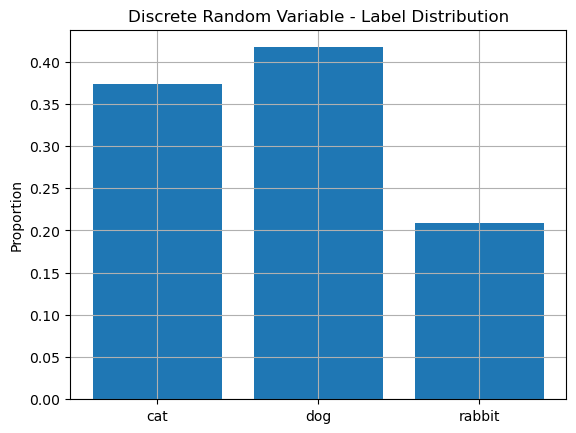

In [1]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.random.choice(['cat', 'dog', 'rabbit'], size = 1000, p = [0.4, 0.4 , 0.2])
unique, counts = np.unique(labels, return_counts = True)

plt.bar(unique, counts/len(labels))
plt.title("Discrete Random Variable - Label Distribution")
plt.ylabel("Proportion")
plt.grid(True)
plt.show()

###  Biến Ngẫu Nhiên Liên Tục

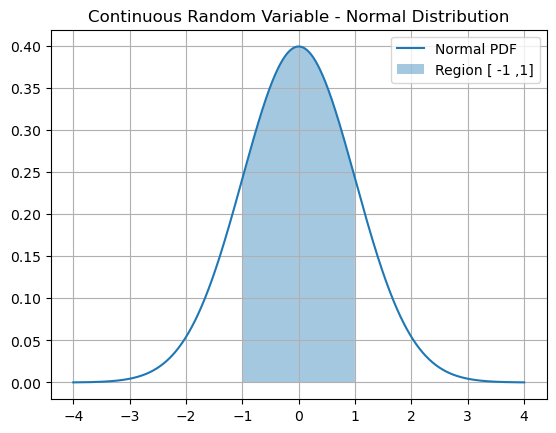

In [3]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, loc = 0, scale = 1)

plt.plot(x, pdf, label = "Normal PDF")
plt.fill_between(x, pdf, where = (x > -1) & (x < 1), alpha = 0.4, label = "Region[-1 , 1]")
plt.title("Continuous Random Variable - Normal Distribution")
plt.legend()
plt.grid(True)
plt.show()


### Mô Hình Naive Bayes và Biến Ngẫu Nhiên

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples = 1000, n_features = 10, n_classes = 2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.8766666666666667


### Biến Ngẫu Nhiên Tiềm Ẩn trong VAE

In [8]:
mu = np.zeros(10)
sigma = np.ones(10)
eps = np.random.normal(size = 10)
z = mu + sigma * eps
print("Sampled latent vector z:", z)

Sampled latent vector z: [-0.96000812 -0.93214928  0.10788084 -1.38512589  1.68628891 -1.06139363
  0.12263665  0.0027828  -0.69785956 -1.31494427]


## Bài tập

### Bài 1

In [7]:
import numpy as np
import matplotlib.pyplot as plt

labels = np.random.choice(['cat', 'dog', 'rabbit'], size = 1000, p = [0.4, 0.4 , 0.2])
labels[:10]

array(['dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'rabbit', 'cat',
       'cat'], dtype='<U6')

In [11]:
np.unique(labels[:10], return_counts = True)

(array(['cat', 'dog', 'rabbit'], dtype='<U6'), array([5, 4, 1], dtype=int64))

### Bài 2

In [13]:
random_vectors = np.random.normal(0, 1, size=(100, 10))

mean = np.mean(random_vectors, axis=0)
mean

array([-0.01824753, -0.00357873, -0.06896287,  0.01810056,  0.06985361,
        0.07542958, -0.07540988, -0.12003168, -0.00312237,  0.06027758])

In [14]:
std_value = np.std(random_vectors)
std_value

0.9701466867090016

### Bài 3

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

samples = np.random.normal(0, 1, size=10000)

count_in_range = np.sum((samples > -1) & (samples < 1))
estimated_probability = count_in_range / len(samples)
estimated_probability

0.6834

### Bài 4

In [22]:
sample = np.random.choice(['positive', 'neutral', 'negative'], size = 1000, p = [0.3, 0.5 , 0.2])
sample

array(['neutral', 'positive', 'negative', 'positive', 'neutral',
       'negative', 'positive', 'positive', 'neutral', 'positive',
       'positive', 'neutral', 'neutral', 'neutral', 'positive',
       'negative', 'neutral', 'neutral', 'negative', 'positive',
       'negative', 'positive', 'neutral', 'neutral', 'negative',
       'neutral', 'positive', 'positive', 'negative', 'positive',
       'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'negative',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'negative', 'neutral', 'positive', 'neutral', 'negative',
       'positive', 'neutral', 'neutral', 'negative', 'positive',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'negative', 'negative', 'positive', 'neutral',
       'positive', 'negative', 'neutral', 'neutral', 'positive',
       'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'negative',
       'negative', 'neutral', 'neutral', 'positive', 

In [23]:
unique, counts = np.unique(sample, return_counts=True)
unique, counts

(array(['negative', 'neutral', 'positive'], dtype='<U8'),
 array([215, 499, 286], dtype=int64))

In [25]:

empirical_pmf = counts/len(sample)
empirical_pmf

array([0.215, 0.499, 0.286])

In [27]:
import pandas as pd

result = pd.DataFrame({'label': unique, 'count': counts, 'pmf': empirical_pmf})
result

,label,count,pmf
0,negative,215,0.215
1,neutral,499,0.499
2,positive,286,0.286


### Bài 5

$$z = \mu + \sigma \cdot \epsilon, \quad \epsilon \sim \mathcal{N}(0,1)$$

In [28]:
mu = 2.0     
sigma = 0.5   

epsilon = np.random.normal(0, 1, size=1000)
z = mu + sigma * epsilon
z

array([2.21016557, 1.5040498 , 1.3569718 , 2.44929933, 2.45671959,
       1.91990452, 2.21755411, 1.9577448 , 0.32603997, 1.81595811,
       2.43790093, 2.62221139, 1.50987313, 2.0294782 , 1.9602789 ,
       1.37368677, 1.85078532, 2.32742708, 2.09568697, 1.33507749,
       2.22737372, 2.04815924, 2.36778476, 1.96726605, 1.9529516 ,
       2.33744084, 2.34553325, 1.78671249, 2.29224543, 1.7159565 ,
       2.91949315, 1.80025748, 1.15218193, 1.77516913, 2.58240036,
       1.86751494, 1.77818345, 1.67536841, 2.32915782, 1.20703582,
       1.61729958, 2.73685537, 2.80071608, 2.39530774, 1.90790192,
       2.11120374, 2.39585834, 2.2456636 , 2.15620223, 2.36556388,
       2.21591947, 2.67153668, 1.56547133, 1.64439881, 3.0256187 ,
       1.33238236, 1.32998656, 1.67948712, 1.54821595, 2.48908638,
       1.93469548, 2.84077678, 1.59607767, 1.58269411, 1.19007307,
       2.2041552 , 2.05684775, 1.85202382, 2.29887816, 2.66349908,
       0.98856658, 2.48010841, 1.92448889, 0.82836245, 1.40015